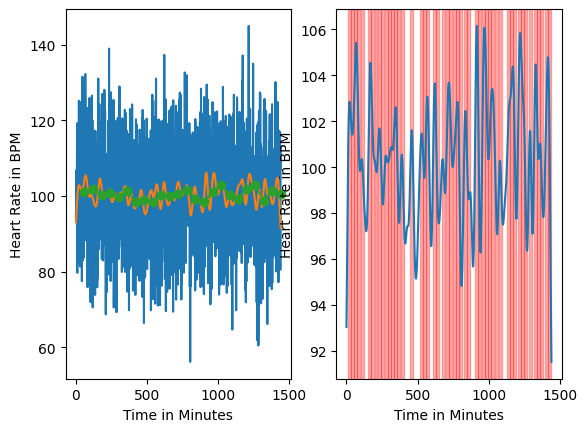

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

iniheartrate=np.random.random(1440)
iniheartrate=iniheartrate*30+85
noise= np.random.normal(0,1,1440)
noisedhr=noise*10+iniheartrate

order=4
freq=0.05

b,a=sig.butter(order,freq)
smoothhr=sig.filtfilt(b,a,noisedhr)

hourlydata= smoothhr.reshape(24,60)
hourlyavg= np.mean(hourlydata,axis=1)
hours=np.empty(24)
for i in range(0,24):
    hours[i]=(i+1)*60
plt.subplot(1,2,1)
plt.plot(noisedhr)
plt.plot(smoothhr)
plt.plot(hours,hourlyavg, marker='o')
plt.xlabel("Time in Minutes")
plt.ylabel("Heart Rate in BPM")
def findexceeded(smoothhr):
    exceeded=[]
    start=-1
    for i in range(0,1440):
        if start==-1 and smoothhr[i]>100:
            start=i
        else:
            if start!=-1 and i-start>20:
                exceeded.append((start,i))
                start=-1
    return exceeded

exceeded=findexceeded(smoothhr)
plt.subplot(1,2,2)
for start,end in exceeded:
    plt.axvspan(start,end,color='r', alpha=0.3)

plt.plot(smoothhr)
plt.xlabel("Time in Minutes")
plt.ylabel("Heart Rate in BPM")
plt.show()
